### Download the flowers dataset
<font size="4"> http://download.tensorflow.org/example_images/flower_photos.tgz </font>

In [1]:
#You can download the data manually as well instead of using 'wget'
!wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

### Explore the dataset

In [2]:
#Read the dataset
import tarfile
dataset = tarfile.open('flower_photos.tgz')

In [3]:
#Print out all the directories
for name in dataset.getnames():
    tar_member = dataset.getmember(name)
    if(tar_member.isdir()):
         print(name)

flower_photos
flower_photos/roses
flower_photos/sunflowers
flower_photos/tulips
flower_photos/daisy
flower_photos/dandelion


### Building Info on the dataset

In [4]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class','dir','image_file'])

In [5]:
#Run through tarfile members 
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    #Check if it is a file
    if(tar_mem.isfile() and name.endswith('.jpg')):
        #Build directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        #Add record to the dataframe
        df.loc[df.shape[0]] = [im_class, im_dir, name]
        

In [6]:
#Check contents of the dataframe
print('Total images: ', df.shape[0])
df.head()

Total images:  3670


,class,dir,image_file
0,roses,flower_photos/roses,flower_photos/roses/14810868100_87eb739f26_m.jpg
1,roses,flower_photos/roses,flower_photos/roses/1446090416_f0cad5fde4.jpg
2,roses,flower_photos/roses,flower_photos/roses/15319767030_e6c5602a77_m.jpg
3,roses,flower_photos/roses,flower_photos/roses/15032112248_30c5284e54_n.jpg
4,roses,flower_photos/roses,flower_photos/roses/7211616670_2d49ecb3a5_m.jpg


In [7]:
#images by class
print(df.groupby(['class']).size())

class
daisy         633
dandelion     898
roses         641
sunflowers    699
tulips        799
dtype: int64


### Extract all images to disk

In [8]:
#extract data
dataset.extractall(path='data/')

### Create training and test dataset

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_df.to_csv('data/flower_photos/train.csv',index=False)
test_df.to_csv('data/flower_photos/test.csv', index=False)

In [11]:
import tensorflow as tf

#### Load image from the disk

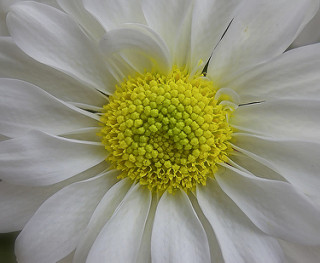

In [13]:
#Load an image using Keras image class
image_file = 'data/flower_photos/daisy/100080576_f52e8ee070_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)

#Inspect image
flower_image

<font size="2">Keras image class is a wrapper for PIL Image class</font>

In [14]:
#Lets check the class type for Keras image
type(flower_image)

PIL.JpegImagePlugin.JpegImageFile

In [15]:
flower_image2 = tf.keras.preprocessing.image.load_img('data/flower_photos/daisy/10140303196_b88d3d6cec.jpg')

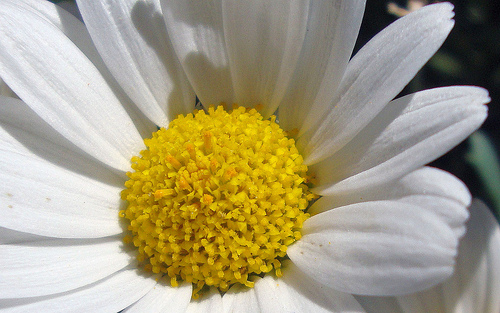

In [16]:
flower_image2

### Image Size

In [17]:
#Size of the image
flower_image.size

(320, 263)

In [18]:
#Size of 2nd image
flower_image2.size

(500, 313)

In [21]:
#Resizing image
flower_image = flower_image.resize([128,128])

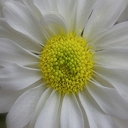

In [22]:
flower_image

### Converting image to numpy array for ML

In [23]:
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)
print('Shape of numpy array', flower_array.shape)

Shape of numpy array (128, 128, 3)


In [24]:
#Check the contents of the array
flower_array

array([[[137., 137., 135.],
        [144., 145., 145.],
        [148., 149., 149.],
        ...,
        [153., 153., 151.],
        [154., 154., 153.],
        [152., 152., 153.]],

       [[136., 136., 134.],
        [144., 143., 143.],
        [148., 147., 148.],
        ...,
        [154., 154., 152.],
        [153., 153., 152.],
        [150., 150., 150.]],

       [[135., 134., 130.],
        [142., 141., 138.],
        [146., 144., 144.],
        ...,
        [156., 156., 154.],
        [152., 152., 151.],
        [147., 147., 147.]],

       ...,

       [[ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        ...,
        [129., 125., 124.],
        [128., 124., 123.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        ...,
        [131., 127., 126.],
        [130., 126., 125.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  

### Converting numpy array to image

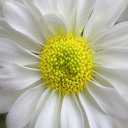

In [25]:
new_image = tf.keras.preprocessing.image.array_to_img(flower_array)

#Show image
new_image

### Read training and test data

In [26]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [27]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [28]:
#Define some parameters
img_size = 60
img_depth = 3  

### Build batch generator

In [29]:
df.head()

,class,dir,image_file
0,roses,flower_photos/roses,flower_photos/roses/14810868100_87eb739f26_m.jpg
1,roses,flower_photos/roses,flower_photos/roses/1446090416_f0cad5fde4.jpg
2,roses,flower_photos/roses,flower_photos/roses/15319767030_e6c5602a77_m.jpg
3,roses,flower_photos/roses,flower_photos/roses/15032112248_30c5284e54_n.jpg
4,roses,flower_photos/roses,flower_photos/roses/7211616670_2d49ecb3a5_m.jpg


In [30]:
df.shape

(3670, 3)

In [33]:
import numpy as np
np.random.randint(0,df.shape[0], 32)

array([2041, 1774,  424, 2214,  181, 1406,  776, 2350, 1236, 2355, 3354,
        952, 1664, 3004, 2074, 1307, 1168, 2908, 2168,  932, 3196, 3254,
       2886, 2346, 3210, 3267, 3497, 2609, 2018, 1094, 1652, 2276])

In [34]:
def batch_generator(df, batchsize=32):   
    
    while True:       
                
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0], batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build ANN Model

In [35]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((10800,),input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 10800)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10800)             43200     
_________________________________________________________________
dense (Dense)                (None, 200)               2160200   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0

### Train the model

In [38]:
train_df.shape

(2936, 3)

In [40]:
2936/64

45.875

In [39]:
test_df.shape

(734, 3)

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
45/45 [==============================] - 13s 236ms/step - loss: 1.6108 - accuracy: 0.3755 - val_loss: 4.0220 - val_accuracy: 0.2997
Epoch 2/10
45/45 [==============================] - 10s 233ms/step - loss: 1.2395 - accuracy: 0.4859 - val_loss: 1.8890 - val_accuracy: 0.3580
Epoch 3/10
45/45 [==============================] - 10s 230ms/step - loss: 1.1204 - accuracy: 0.5611 - val_loss: 1.3101 - val_accuracy: 0.4616
Epoch 4/10
45/45 [==============================] - 10s 225ms/step - loss: 1.0042 - accuracy: 0.6126 - val_loss: 1.2983 - val_accuracy: 0.5298
Epoch 5/10
45/45 [==============================] - 10s 228ms/step - loss: 0.7944 - accuracy: 0.7035 - val_loss: 1.3353 - val_accuracy: 0.4815
Epoch 6/10
45/45 [==============================] - 10s 228ms/step - loss: 0.7842 - accuracy: 0.7063 - val_loss: 1.3831 - val_accuracy: 0.4403
Epoch 7/10
45/45 [==============================] - 10s 231ms/step - loss: 0.6512 - accuracy: 0.7738 - val_loss: 1.5645 - val_accuracy: 0.4261

In [41]:
# Image Augmentation Techniques

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Load image from the disk

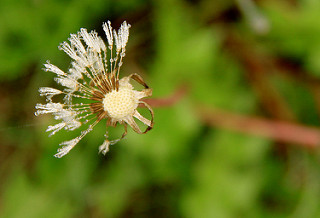

In [43]:
#Load an image using Keras image class
image_file = 'data/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)

#Inspect image
flower_image

Build a function to display Original and Transformed Image

In [44]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

### Flip an image

In [45]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [46]:
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

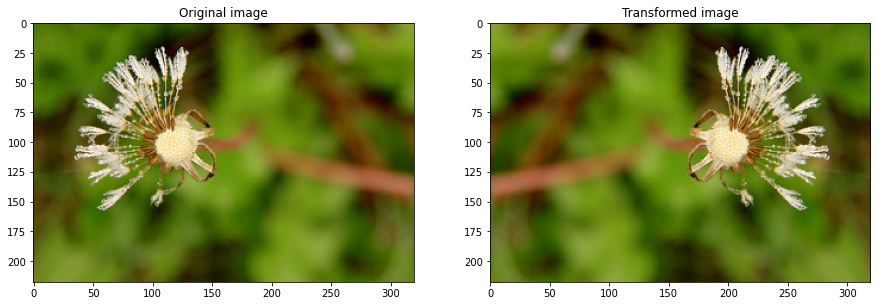

In [47]:
plot_images(flower_image, transformed_image)

### Shifting image

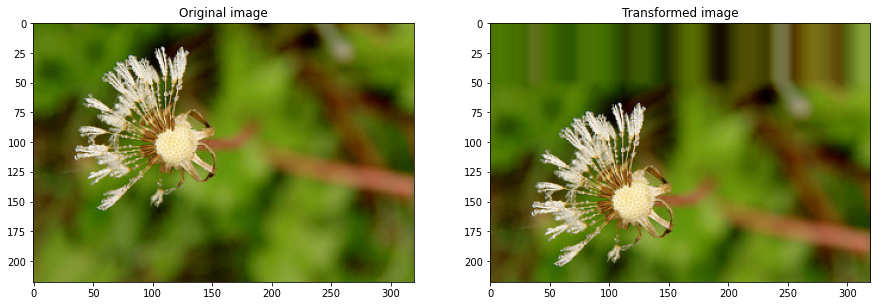

In [49]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=150)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Rotating image

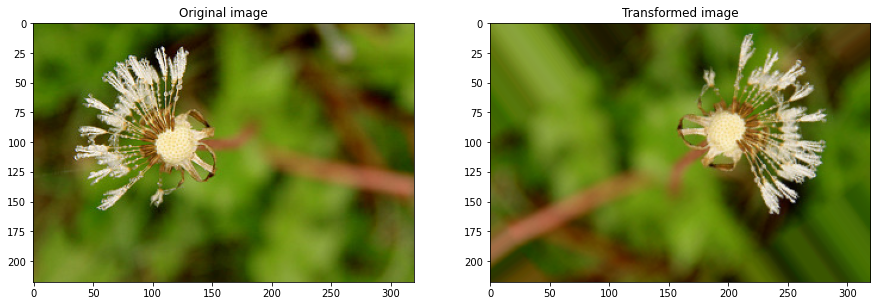

In [51]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=190)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Zooming image

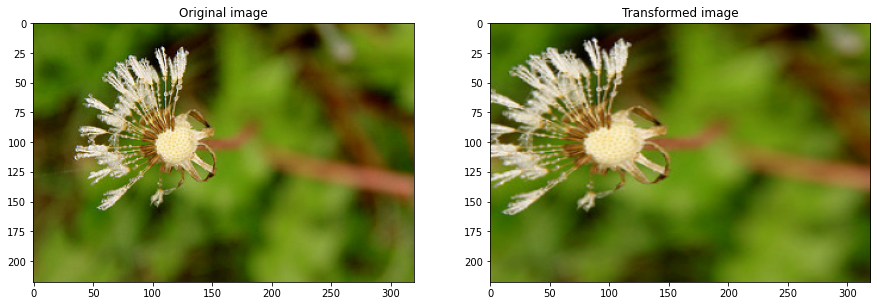

In [54]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.1, 1.9])
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Applying multiple transforms

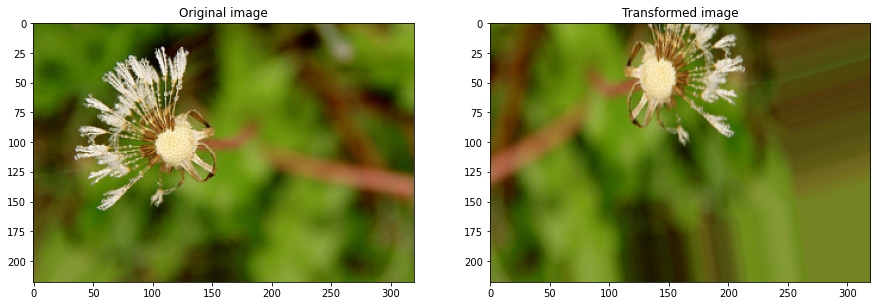

In [57]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

In [58]:
#Model Performance after Image Augmentation

### Read training and test data

In [59]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [60]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [61]:
#Define some parameters
img_size = 60
img_depth = 3  

### Build batch generator

In [62]:
import numpy as np

In [63]:
def batch_generator(df, batchsize=32, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build ANN Model

In [64]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((10800,),input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(5000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(5000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(600))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [65]:
ad=tf.keras.optimizers.Adam(lr=0.05)
model.compile(optimizer=ad, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Train the model

In [ ]:
#Create train and test generator
batchsize = 128
train_generator = batch_generator(train_df, batchsize=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 13s 594ms/step - loss: 1.3632 - accuracy: 0.3967 - val_loss: 1.8237 - val_accuracy: 0.4031
Epoch 2/10
22/22 [==============================] - 13s 595ms/step - loss: 1.3280 - accuracy: 0.4283 - val_loss: 1.3958 - val_accuracy: 0.3891
Epoch 3/10
22/22 [==============================] - 12s 586ms/step - loss: 1.3116 - accuracy: 0.4325 - val_loss: 1.3068 - val_accuracy: 0.4344
Epoch 4/10
22/22 [==============================] - 12s 591ms/step - loss: 1.2987 - accuracy: 0.4261 - val_loss: 1.2371 - val_accuracy: 0.4453
Epoch 5/10
22/22 [==============================] - 13s 594ms/step - loss: 1.3010 - accuracy: 0.4379 - val_loss: 1.2620 - val_accuracy: 0.4969
Epoch 6/10
22/22 [==============================] - 12s 592ms/step - loss: 1.2516 - accuracy: 0.4492 - val_loss: 1.2353 - val_accuracy: 0.4625
Epoch 7/10
22/22 [==============================] - 12s 588ms/step - loss: 1.2926 - accuracy: 0.4379 - val_loss: 1.1841 - val_accuracy: 0.4750